# NBA Data  Exploration 
## Introduction
> In this notebook, I mainly be analyzing the offensive stats since 1980 which most of it will be done in the first half. Most of it will be visualizing the total and averages of the entire league, but as you go further along, you will find that I will be interested in seperating these stats by teams and Finals rankings, as well as a new column called era. The goal of this notebook is to analyze the regular season offensive characteristics of champions, runner-ups, and those team who were knocked out or never made the playoff. <br> <br>
First, I will examine the datasets and use the nba_total_df dataset to get a broad picture of what I am working with. Please keep in mind the year represents the season that ends in that year. For example, 1980 means the 1979-1980 season.

In [62]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## Examining Dataset

In [63]:
nba_avg_df = pd.read_csv('data/cleaned_avg_stats.csv')
nba_total_df = pd.read_csv('data/cleaned_total_stats.csv')

In [64]:
nba_avg_df.head()

,Team,Age,Wins,Losses,Year,Playoff,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,3PAr,eFG%,FT,FTA,FT%,TS%,AST,ORB,TRB,PTS,MOV,ORtg,DRtg,Pace,TOV%,ORB%,Finals_Rk
0,Boston Celtics,27.3,61,21,1980,True,44.1,90.1,49.0,42.1,84.9,49.6,2.0,5.1,38.4,5.7,50.1,23.3,29.9,77.9,55.0,26.8,15.0,44.9,113.5,7.79,109.4,101.9,102.6,15.4,34.8,Knocked Out
1,Los Angeles Lakers,26.2,60,22,1980,True,47.5,89.9,52.9,47.3,88.6,53.4,0.2,1.2,20.0,1.4,53.0,19.8,25.5,77.5,56.9,29.4,13.2,45.6,115.1,5.90,109.5,103.9,104.1,16.5,32.6,Champion
2,Oklahoma City Thunder,27.0,56,26,1980,True,43.3,92.3,47.0,42.6,90.0,47.4,0.7,2.3,31.2,2.5,47.4,21.1,27.5,76.8,52.0,24.9,16.8,47.9,108.5,4.66,105.8,101.2,101.8,14.9,36.4,Knocked Out
3,Philadelphia 76ers,27.0,59,23,1980,True,43.0,87.3,49.2,42.6,85.7,49.7,0.3,1.5,21.6,1.7,49.4,22.9,29.6,77.2,54.4,27.1,14.5,46.6,109.1,4.22,105.0,101.0,103.0,17.2,33.5,Runner-Up
4,Milwaukee Bucks,25.3,49,33,1980,True,44.9,92.1,48.8,44.3,90.2,49.1,0.6,1.9,32.3,2.1,49.1,19.6,25.6,76.4,53.2,27.8,15.2,44.4,110.1,3.94,106.8,102.9,102.4,15.0,35.2,Knocked Out


In [65]:
nba_total_df.head()

,Team,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,ORB,TRB,AST,TOV,PTS,Year,Playoff,Finals_Rk
0,San Antonio Spurs,3856,7738,49.8,3804,7532,50.5,52,206,25.2,2024,2528,1153,3668,2326,1589,9788,1980,True,Knocked Out
1,Los Angeles Lakers,3898,7368,52.9,3878,7268,53.4,20,100,20.0,1622,2092,1085,3738,2413,1639,9438,1980,True,Champion
2,Cleveland Cavaliers,3811,8041,47.4,3775,7854,48.1,36,187,19.3,1702,2205,1307,3688,2108,1370,9360,1980,False,Never Qualified
3,New York Knicks,3802,7672,49.6,3760,7481,50.3,42,191,22.0,1698,2274,1236,3539,2265,1613,9344,1980,False,Never Qualified
4,Boston Celtics,3617,7387,49.0,3455,6965,49.6,162,422,38.4,1907,2449,1227,3684,2198,1539,9303,1980,True,Knocked Out


In [66]:
nba_total_df.describe()

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,ORB,TRB,AST,TOV,PTS,Year
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.00000,1164.000000,1164.000000
mean,3122.521478,6747.084192,46.204811,2698.753436,5543.422680,48.725859,423.768041,1203.661512,33.380241,1556.841065,2061.621134,988.613402,3432.908076,1859.371993,1242.43299,8225.652062,2001.587629
std,368.029085,640.322398,2.110644,508.265503,1025.623781,2.388647,269.368159,721.838568,4.696755,249.801021,323.153204,184.373140,305.780930,259.814763,181.17617,865.297277,11.868369
min,1539.000000,3561.000000,40.100000,1327.000000,2761.000000,42.100000,10.000000,75.000000,10.400000,745.000000,1077.000000,472.000000,1788.000000,782.000000,641.00000,4095.000000,1980.000000
25%,2956.750000,6518.000000,44.700000,2400.750000,4939.000000,47.100000,203.500000,617.250000,32.200000,1409.750000,1867.750000,858.000000,3336.750000,1712.750000,1136.75000,7913.000000,1992.000000
50%,3123.500000,6807.000000,46.100000,2578.000000,5384.500000,48.600000,415.000000,1184.000000,34.600000,1555.000000,2075.000000,985.000000,3473.500000,1851.500000,1230.00000,8291.500000,2002.000000
75%,3357.000000,7128.250000,47.500000,3117.000000,6419.500000,50.200000,593.250000,1631.000000,36.300000,1721.250000,2288.000000,1115.250000,3611.000000,2028.250000,1351.00000,8740.000000,2012.000000
max,3980.000000,8868.000000,54.500000,3954.000000,7873.000000,56.700000,1323.000000,3721.000000,42.800000,2388.000000,3051.000000,1520.000000,4078.000000,2575.000000,1873.00000,10371.000000,2021.000000


In [67]:
nba_avg_df.describe()

,Age,Wins,Losses,Year,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,3PAr,eFG%,FT,FTA,FT%,TS%,AST,ORB,TRB,PTS,MOV,ORtg,DRtg,Pace,TOV%,ORB%
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,26.840206,40.118557,40.118557,2001.587629,38.870103,84.049141,46.204811,33.544588,68.918299,48.725859,5.328351,15.130928,33.380241,18.121564,49.396220,19.370103,25.657646,75.533247,53.709364,23.147509,12.304210,42.781959,102.439347,-0.004072,106.776546,106.769674,95.209021,13.945876,28.744244
std,1.646497,12.779687,12.731692,11.868369,3.272410,4.668796,2.110644,5.362144,10.807625,2.388647,3.434205,9.220323,4.696755,10.729955,2.324549,2.557043,3.294632,2.939163,2.144069,2.604412,2.002756,2.139628,7.235404,4.638996,3.939481,3.661148,4.936386,1.268837,4.257576
min,22.700000,7.000000,9.000000,1980.000000,30.800000,71.200000,40.100000,23.100000,41.900000,42.100000,0.100000,0.900000,10.400000,1.100000,42.400000,12.200000,16.600000,66.000000,46.800000,15.600000,7.600000,35.600000,81.900000,-15.200000,92.200000,94.100000,82.300000,9.900000,17.900000
25%,25.700000,30.000000,30.000000,1992.000000,36.400000,80.600000,44.700000,29.700000,61.300000,47.100000,2.600000,7.900000,32.200000,9.000000,47.800000,17.500000,23.300000,73.800000,52.300000,21.200000,10.800000,41.300000,97.000000,-3.182500,104.175000,104.300000,91.375000,13.100000,25.600000
50%,26.700000,41.000000,40.000000,2002.000000,38.500000,83.800000,46.100000,31.500000,66.000000,48.600000,5.200000,14.700000,34.600000,18.250000,49.200000,19.100000,25.500000,75.600000,53.600000,22.900000,12.150000,42.700000,102.000000,0.245000,106.600000,107.000000,94.600000,13.900000,29.000000
75%,27.900000,50.000000,49.000000,2012.000000,41.300000,87.400000,47.500000,38.000000,78.300000,50.200000,7.300000,20.200000,36.300000,24.800000,50.800000,21.000000,28.000000,77.500000,55.100000,25.000000,13.600000,44.300000,107.800000,3.425000,109.500000,109.400000,98.900000,14.800000,31.800000
max,32.000000,73.000000,72.000000,2021.000000,48.500000,108.100000,54.500000,48.200000,96.000000,56.700000,16.700000,45.400000,42.800000,51.900000,57.500000,29.100000,37.200000,83.900000,61.000000,31.400000,18.500000,51.700000,126.500000,12.240000,118.300000,117.600000,113.700000,18.700000,39.100000


## Data Exploration - Visualization and Analysis
## Questions - nba_total_df
> **nba_total_df** <br> <br>
`1.`How many of the total points scored were from 3-pointers? <br>
`2.`What is the trend like total for 3-point and 2-point shot attempts over the years? What about Free-Throw attempts?<br>
`3.`Is there similair trend for the other offensive stats(Offensive Rebound & Assists)? Analyze them too.<br>
`4.`How many times did each team make the playoff since 1980? <br>
`5.`How many teams won the NBA championships since 1980? How many times did each team win?<br>
`6.`Examine the Finals_Rk column by Team. How many times did each team get knocked out, never qualified, become runner-up or champion?


### nba_total_df
> First, I want to mainly focus on big numbers which is why I decided to start with the `nba_total_df` dataset. I do this to get a big picture view of the data that I am working with before I move onto the smaller numbers(percentages). I believe that after seeing numbers that big I might find some surprising results later on. However, I will also include some statistics when answering some of the questions during my analysis process of this dataset.<br>

**`1.`How many of the total points scored were from 3-pointers?** 

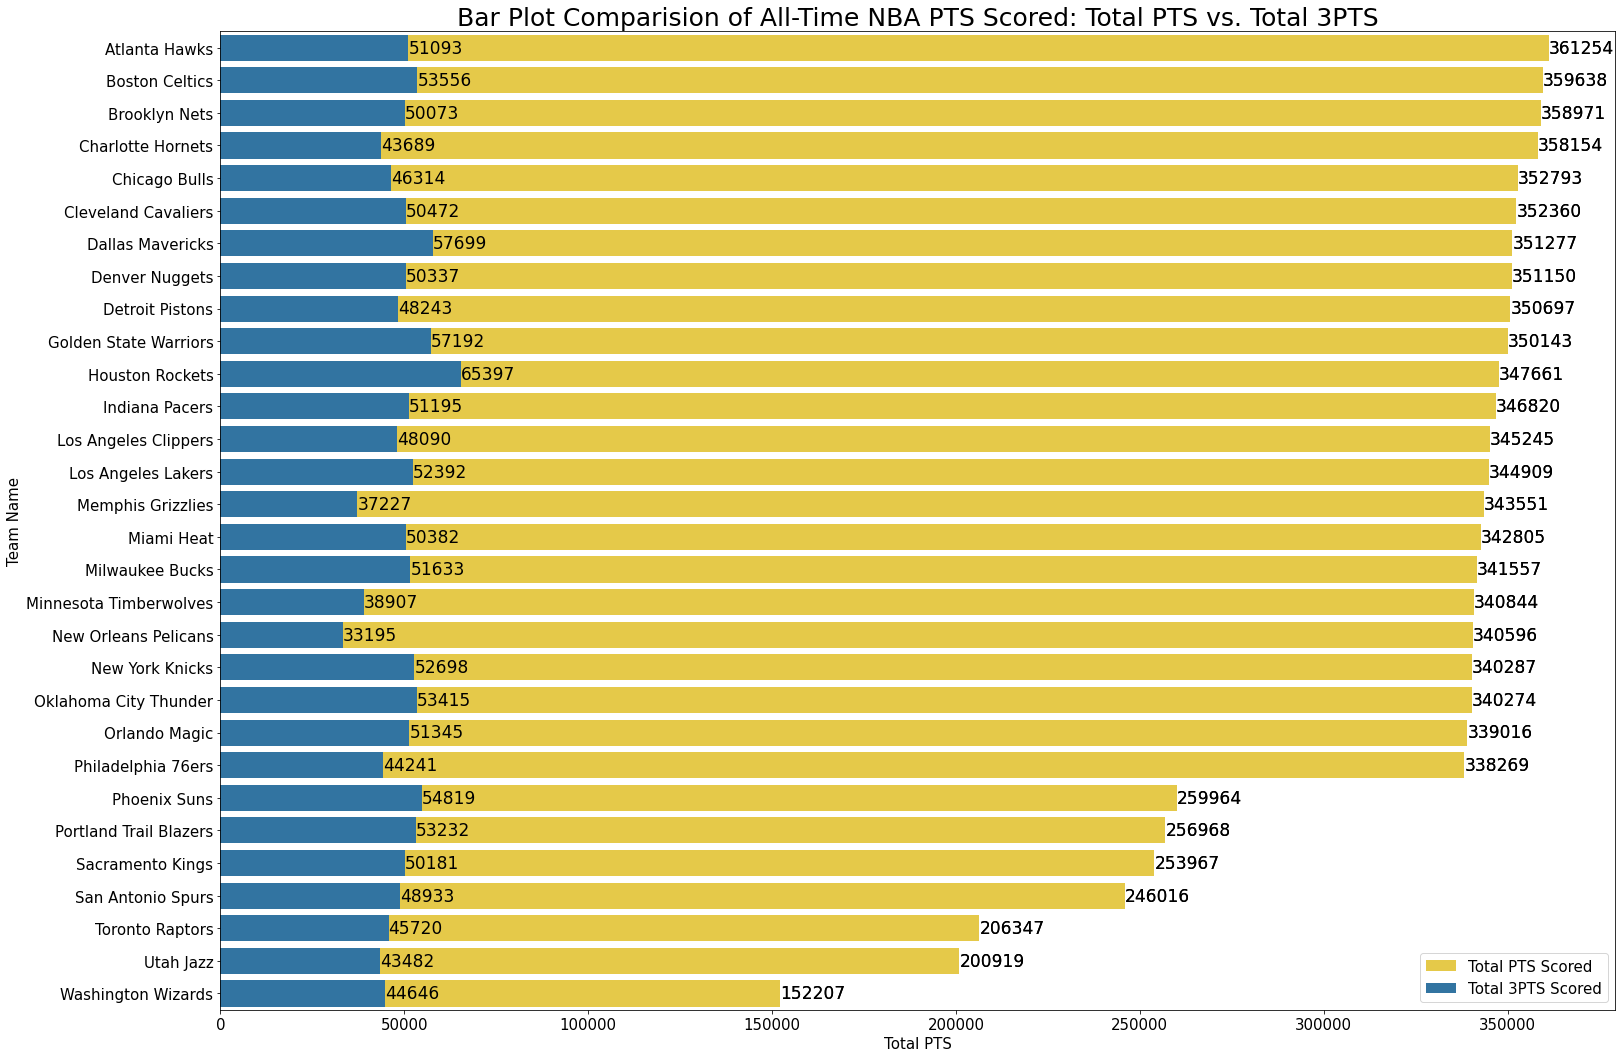

In [68]:
# dataframe for total PTS scored throught out all NBA seasons
total_team_pts= pd.DataFrame(nba_total_df.groupby('Team')['PTS'].sum().sort_values(ascending = False).reset_index())

# dataframe for total 3-PTS scored throught out all NBA seasons
# 3P only counts the number of shots that went in, so we must multiple that by 3
total_3pts_score = pd.DataFrame((nba_total_df.groupby('Team')['3P'].sum()*3).reset_index())

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 18))

#plot total PTS on bar graph
base_color = sb.color_palette("Set2")[5]
sb.barplot(data = total_team_pts, x = 'PTS', y = 'Team', color = base_color, 
           label = 'Total PTS Scored')
for i in ax.containers:
    ax.bar_label(i, fontsize = 17);

# plot 3PT on bar graph
base_color_2 = sb.color_palette()[0]
sb.barplot(data = total_3pts_score, x = '3P', y = 'Team', color = base_color_2, 
           label = 'Total 3PTS Scored')
for i in ax.containers:
    ax.bar_label(i, fontsize = 17);

ax.legend(loc = "lower right", frameon=True, fontsize = 15)
plt.title('Bar Plot Comparision of All-Time NBA PTS Scored: Total PTS vs. Total 3PTS', fontsize = 25)
plt.ylabel('Team Name', fontsize = 15)
plt.xlabel('Total PTS', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [69]:
(nba_total_df.groupby('Team')['3P'].sum()*3).sort_values(ascending = False).head()

Team
Houston Rockets          65397
Dallas Mavericks         57699
Golden State Warriors    57192
Phoenix Suns             54819
Boston Celtics           53556
Name: 3P, dtype: int64

In [70]:
prop_3pts = ((nba_total_df.groupby('Team')['3P'].sum()*3)/nba_total_df.groupby('Team')['PTS'].sum()).sort_values(ascending = False)
prop_3pts.head()

Team
Toronto Raptors         0.221569
New Orleans Pelicans    0.218091
Orlando Magic           0.199811
Miami Heat              0.193804
Houston Rockets         0.186772
dtype: float64

**Question 1 Observation**
> Before I jump into the explanation, please note that all teams are updated to their current names. For example, the Seattle Supersonics moved to Oklahoma City and became the Thunders. We did not count the SuperSonics' stats but combined it with Oklahoma City because of their shared franchise history. In this bar graph, we see that the Atlanta Hawks have scored the most regular-season points in NBA history with 361,254 points as of the end of the year 2021 (2020-2021 season). The Boston Celtics and Brooklyn Nets came in second and third, respectively. However, the Hawks do not take the top spot for the total of 3 points made; that title belongs to the Houston Rockets with 65,397 points that were scored from the 3-point line or beyond. Trailing the Rockets are the Dallas Mavericks and Golden State Warriors; the latter is very close to overtaking the former. <br> <br>Through further statistical analysis, I also found that 22.16% of the Raptors' total points were 3-pointers. However, upon even further research online, we found that the team was founded in 1995. They have more than Charlotte Hornets, who have scored far more total points and a long history! This leads me to my next question. 

**`2.`What is the trend like total for 3-point and 2-point shot attempts over the years? What about Free-Throw attempts?** 

In [71]:
nba_total_df.groupby('Year')['3PA'].sum()

Year
1980     5003
1981     3815
1982     4308
1983     4248
1984     4484
1985     5917
1986     6293
1987     8913
1988     9421
1989    13431
1990    14608
1991    15812
1992    16898
1993    19824
1994    21907
1995    33889
1996    38161
1997    39943
1998    30231
1999    19080
2000    32614
2001    32597
2002    35074
2003    34912
2004    35492
2005    38748
2006    39313
2007    41672
2008    44544
2009    44583
2010    44622
2011    44313
2012    36395
2013    49067
2014    52974
2015    55137
2016    59241
2017    66422
2018    71340
2019    78742
2020    72252
2021    74822
Name: 3PA, dtype: int64

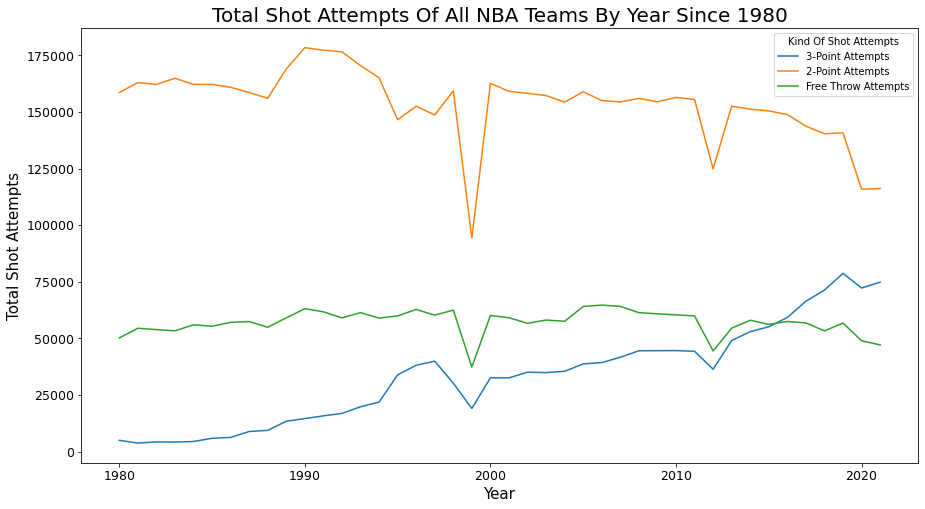

In [72]:
plt.figure(figsize = [15,8])
nba_total_df.groupby('Year')['3PA'].sum().plot(label = '3-Point Attempts')
nba_total_df.groupby('Year')['2PA'].sum().plot(label = '2-Point Attempts')
nba_total_df.groupby('Year')['FTA'].sum().plot(label = 'Free Throw Attempts');

plt.title('Total Shot Attempts Of All NBA Teams By Year Since 1980', fontsize = 20)
plt.legend(title = 'Kind Of Shot Attempts')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Shot Attempts', fontsize = 15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5);

**Question 2 Observation**
> In this graph, there are two lines; one represents the total 2-point shot attempts and one represents the total 3-point shot attempts during the regular season. Starting with the 2-point line, we can see that the total number of attempts has remained somewhat steady since 1980, but shows a very slight declining trend. It started off a little above 150,000 shots at the beginning of 1980 before shooting up at the end of the 80s. Going into the 90s it began to drop off and stayed close to 150,000 shot attempts up until 2010. There is a sharp decrease in 1999 before recovering to around 150,000. This sharp decrease and sudden increase happened again at the start of the 2010s era. This sharp decreaase in total shot attempts is also telling us that the average total shot attempts must have decreased as well. After the recovery to 150,000, the line shows an obvious downtrend which ended at around 125,000 by 2021. This means that players have been taking fewer shots since around 2015.<br><br>
Moving on to the 3-point line, we can see the dramatic increase in this kind of shot attempt over the years. It started off at 5000 shot attempts at the start of the 1980s, then it increased drastically as time went on. By the end of 2021, the NBA 3-point attempts in a season totaled to about 75,000, which is 15x more than in the '80s when 3-point shots were first recorded! However, similar to the 2-point line we also see sharp declines in 1999 and the beginning of 2010. I am beginning to suspect something happened those years, but let's see how some other stats fare.<br> <br>
The free-throw line has remained relatively steady since 1980, staying near the 50k attempts range. There is a slight decrease at the end, but this seems to be a pattern with all 3 lines. Furthermore, we also saw those massive dips in 1999 and at the start of 2010. We should check out some of the other offensive stats to see if this trend carries over. 

**`3.`Is there similair trend for the other offensive stats(Offensive Rebound & Assists)? Analyze them too.**
> Note: This question wasn't part of my original analysis, but came up after examining the total shot attempts and the drastic dips from the last graph.

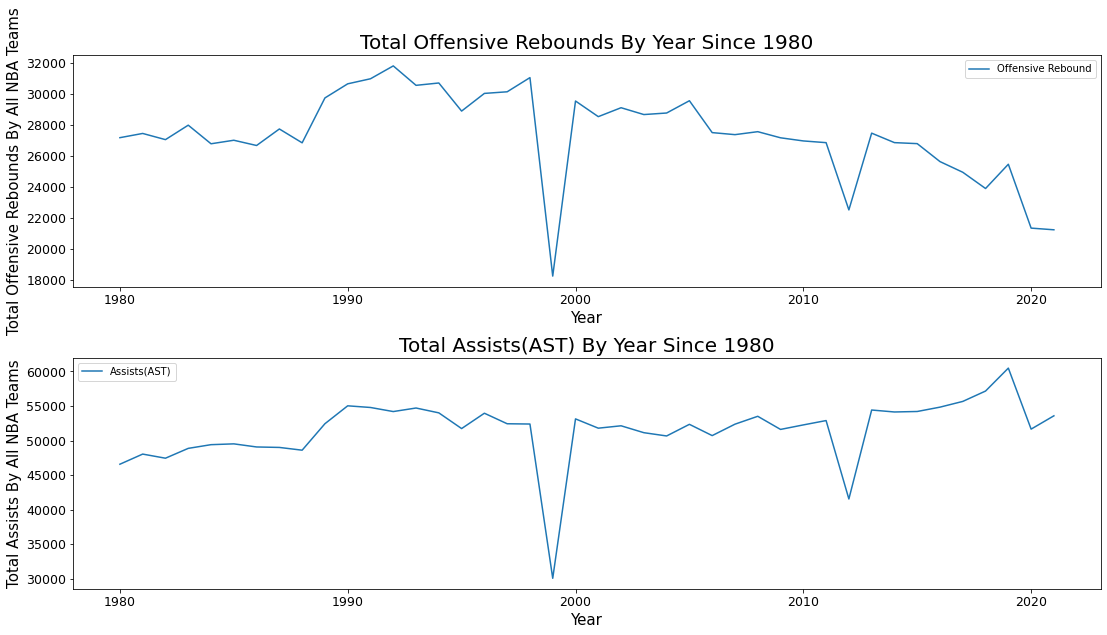

In [73]:
#plt.figure(figsize = [15,8])
fig, ax = plt.subplots(2, 2, figsize = [15,8])
fig.tight_layout(h_pad=5)

plt.subplot(2,1,1)
nba_total_df.groupby('Year')['ORB'].sum().plot(label = 'Offensive Rebound')
plt.title('Total Offensive Rebounds By Year Since 1980', fontsize = 20)
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Offensive Rebounds By All NBA Teams', fontsize = 15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5);

plt.subplot(2,1,2)
nba_total_df.groupby('Year')['AST'].sum().plot(label = 'Assists(AST)')
plt.title('Total Assists(AST) By Year Since 1980', fontsize = 20)
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Assists By All NBA Teams', fontsize = 15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5);

**Question 3 Observation**
>After examining the other offensive stats, it seems like the pattern persists. There are sharp and sudden drops in the year axis at the exact same places, which is the same as the previous graphs we've examined. Upon further independent research online, we found that the NBA those drastic drops were due to the [NBA lockouts](https://en.wikipedia.org/wiki/2011_NBA_lockout#:~:text=The%20161%2Dday%20lockout%20began,the%20season%20to%2050%20games.) when players didn't play due to failed negotiations. Therefore, the season was shortened. However, this doesn't apply to the sudden dip in 2020, which was due to the COVID-19 pandemic. <br><br>
Starting with the offensive rebound (ORB) line plot, we can see that the total number of offensive rebounds in the NBA remained steady at around 27,000 rebounds a year. Going toward the end of the decade and halfway into the '90s decade, the total number of offensive rebounds shot up to over 30-32,000 years, not including the lockout years. Afterward, we see a steady decline over the years, ending with a total of about 21,000 rebounds in 2021. It seems like fewer offensive rebounds are being grabbed. <br><br>
Moving on to the assists (AST) line, we see that the total number of assists in the league remained under 50,000 assists in the '80s. This is the case until near the end of the decade when the total shot up to 55,000 going into the '90s. For the next two decades (except the lockout years), the total number of assists in the league stayed between 50-55k until around 2012, when the total began to increase. It 60,000 total assists in 2019 before dropping again due to the pandemic. It seems that there have been a lot of successful assists made over the last couple of years. 

**`4.` How many times did each team make the playoff since 1980?**

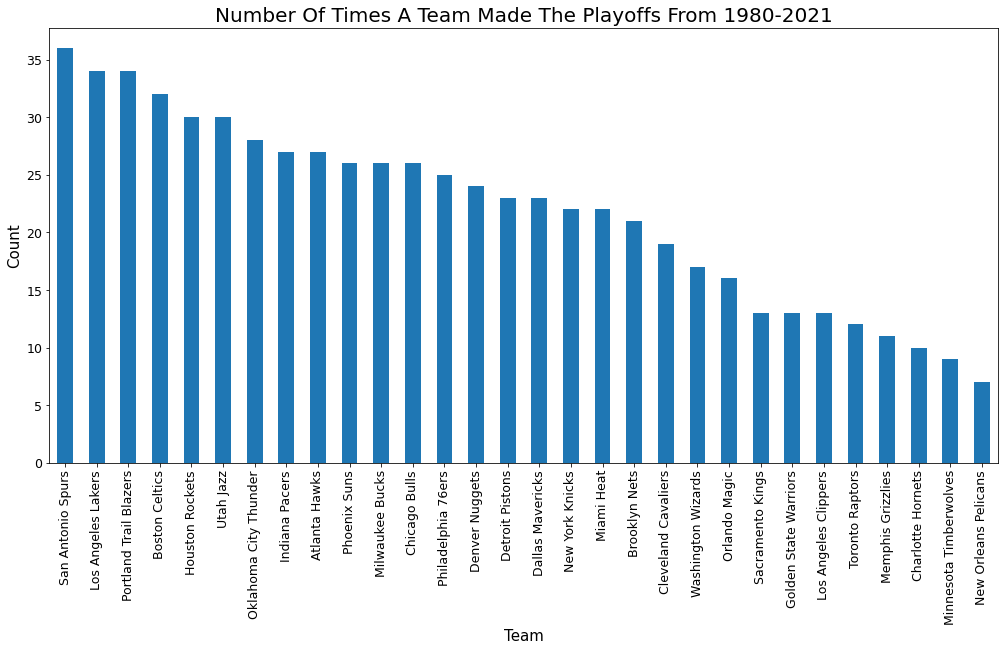

In [74]:
playoff_true_count = nba_total_df[nba_total_df['Playoff']==True]['Team'].value_counts()

f = plt.figure(figsize = [17,8])
playoff_true_count.plot(kind = 'bar')
plt.title('Number Of Times A Team Made The Playoffs From 1980-2021', fontsize = 20)

plt.ylabel('Count', fontsize = 15)
plt.xlabel('Team', fontsize = 15)
plt.yticks(fontsize = 12.5)
plt.xticks(fontsize = 12.5);

In [75]:
playoff_true_count

San Antonio Spurs         36
Los Angeles Lakers        34
Portland Trail Blazers    34
Boston Celtics            32
Houston Rockets           30
Utah Jazz                 30
Oklahoma City Thunder     28
Indiana Pacers            27
Atlanta Hawks             27
Phoenix Suns              26
Milwaukee Bucks           26
Chicago Bulls             26
Philadelphia 76ers        25
Denver Nuggets            24
Detroit Pistons           23
Dallas Mavericks          23
New York Knicks           22
Miami Heat                22
Brooklyn Nets             21
Cleveland Cavaliers       19
Washington Wizards        17
Orlando Magic             16
Sacramento Kings          13
Golden State Warriors     13
Los Angeles Clippers      13
Toronto Raptors           12
Memphis Grizzlies         11
Charlotte Hornets         10
Minnesota Timberwolves     9
New Orleans Pelicans       7
Name: Team, dtype: int64

**Question 4 Observation**
> From the bar graph above, we see that the San Antonio Spurs have made it to the playoffs the most over the years with a total of 36 appearances. Following the Spurs are the Lakers and Blazers, who are both tied for 2nd place with a total of 34 appearances. Going to the other side of the bar graph, we see that the New Orleans Pelicans have made the least appearances in the playoffs since 1980. They are followed by Timberwolves and Charlotte Hornets with 9 and 10 appearances respectively.<br> <br>
Now that we've seen how many times each team made the playoffs,let's see who won the championships over the years!

**`5.`How many teams won the NBA championships since 1980? How many times did each team win?**

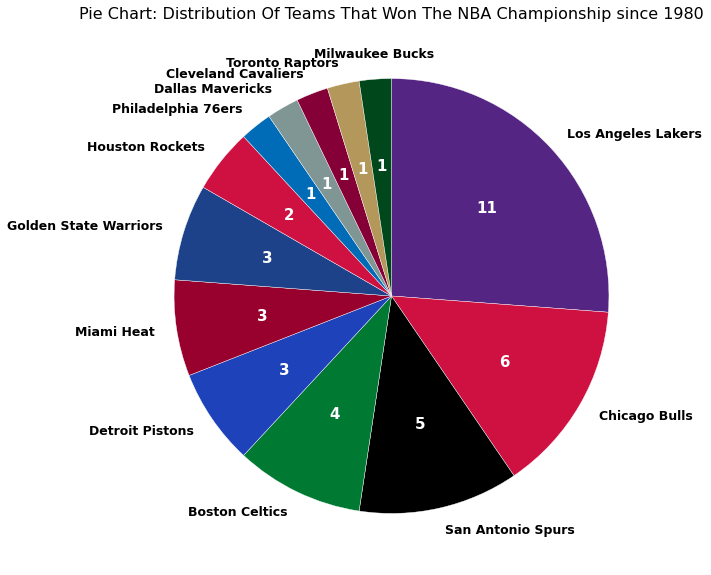

In [76]:
champion_count = nba_total_df[nba_total_df.Finals_Rk == 'Champion']['Team'].value_counts(ascending = False)
labels = list(champion_count.index)
# making a list of team colors
colors = ['#552583', '#CE1141', '#000000', '#007A33', '#1D42BA',
         '#98002E', '#1D428A', '#CE1141', '#006BB6', '#7F9695',
         '#860038','#B4975A', '#00471B']

# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize = [10,10])
patches, texts, autotexts = ax1.pie(champion_count, startangle = 90, counterclock = False, labels = labels, 
                         wedgeprops = dict(linewidth= 0.4, edgecolor = 'white'),
                         labeldistance=1.1, textprops= dict(fontsize = 12.5, weight = 'bold'),
                         autopct=lambda p: '{:.0f}'.format((p *  champion_count.sum())/ 100), colors = colors)
plt.title('Pie Chart: Distribution Of Teams That Won The NBA Championship since 1980', fontsize = 16)

# readjust 'Bucks' label because it overlaps with Rapotors
for t in texts:
    if 'Bucks' in t.get_text():
        t.set_horizontalalignment('center')
        t.set_verticalalignment('baseline')

# alter color, wright nad fontsize of auto texts to make more clear 
# Help Cited --
# https://stackoverflow.com/questions/57062322/python-how-to-change-autopct-text-to-white-and-bold-in-a-pie-chart
plt.setp(autotexts, **{'color':'white', 'weight':'extra bold', 'fontsize':15});

**Question 5 Observation**
> Here is a pie chart of all the NBA champions since 1980. In this chart, we can see that the Lakers have won a little over a quarter of all NBA championships over the last 40 years with 11. Yay! That's my team! Following them are the Chicago Bulls and San Antonio Spurs with 6 and 5 championships, respectively. Looking at the least number of championships over the last 4 decades, we can see that 5 teams are tied for last; those teams are the 76ers, Mavericks, Cavaliers, Raptors, and Bucks. <br><br>Lets examine the distribution for the rest of the Finals rankings before we move on.

**`6.`Examine the Finals_Rk column by Team. How many times did each team get knocked out, never qualified, become runner-up or champion?**

In [77]:
nba_avg_df['Finals_Rk'].unique()

array(['Knocked Out', 'Champion', 'Runner-Up', 'Never Qualified'],
      dtype=object)

In [78]:
# convert Finals_Rk to category data type
Finals_Rk_ordered = ['Champion', 'Runner-Up', 'Knocked Out', 'Never Qualified']
Rk_ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = Finals_Rk_ordered)
nba_total_df['Finals_Rk'] = nba_total_df['Finals_Rk'].astype(Rk_ordered_var )

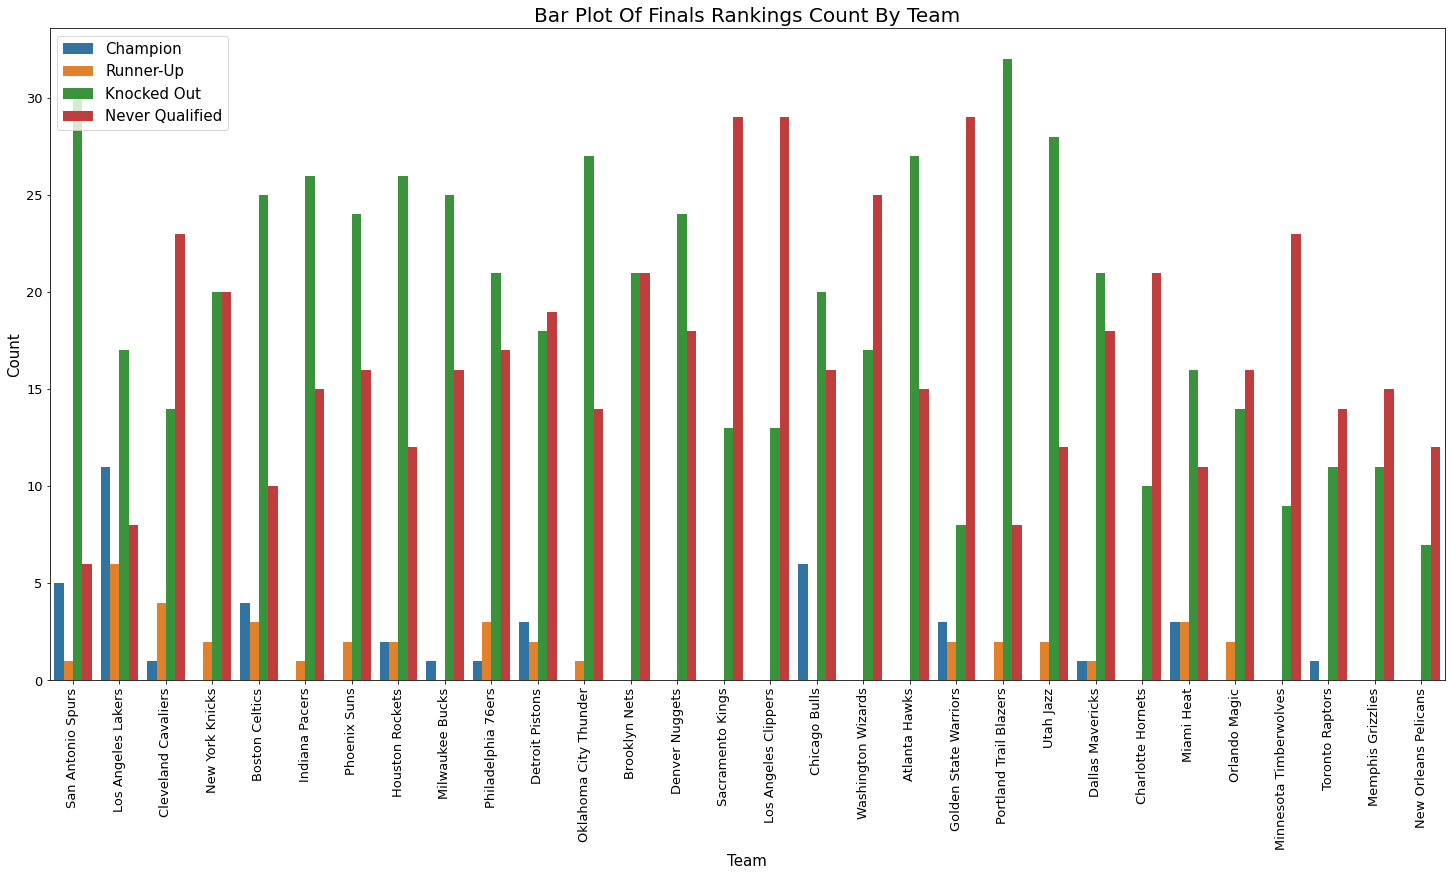

In [79]:
fig, ax = plt.subplots(figsize = [25,12])
sb.countplot(data = nba_total_df, x = 'Team', hue = 'Finals_Rk')
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Team', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Bar Plot Of Finals Rankings Count By Team', fontsize = 20)
plt.legend(prop={'size': 15});

**Question 6 Observation**
> In a previous pie chart observation, we found that the Lakers have won the most NBA championships since 1940 with a total of 11. Following them are the Bulls and Spurs. Next, we will examine the runner-ups. Once again, the Lakers take first place. If we add up the total championship and runner-up years, we find that the Lakers have been to the Finals a total of 17 times in the past 4 decades. Following the Lakers for 2nd in runner-ups are the Cleveland Cavaliers. <br> <br>
Moving on to the next rankings, we find that the Portland Trailblazers have been knocked out of the playoffs the most times in the past 40 years. They are followed by Spurs. Finally, the Warriors, Kings, and Clippers fail to qualify for the playoff the most. On the right side, we can see that there is a far fewer count for some of the teams if we add all the bar charts up. That's because these are newer teams. Out of the newer teams (last 4), we can see that only one championship has been won between all of them, which belongs to the Toronto Raptors. 

### nba_avg_df
> Now that we are done examining the nba_total_df, I want to examine the averages of each team in every season since 1980. Luckily, we do not have to do the math since we web-scraped the information from Basketball-Reference earlier. While the total stats were enjoyable to analyze, examining the averages could give us a better look into each team's performance. Not to mention, we also have some newer columns to work with! <br> <br>
Furthermore, the nba_avg_df has also been adjusted and accounts for the lockouts and COVID period by only calculating the averages of only the games played that season. Therefore, we shouldn't be seeing any sudden, drastic dips now. Let's check it out before we move on!

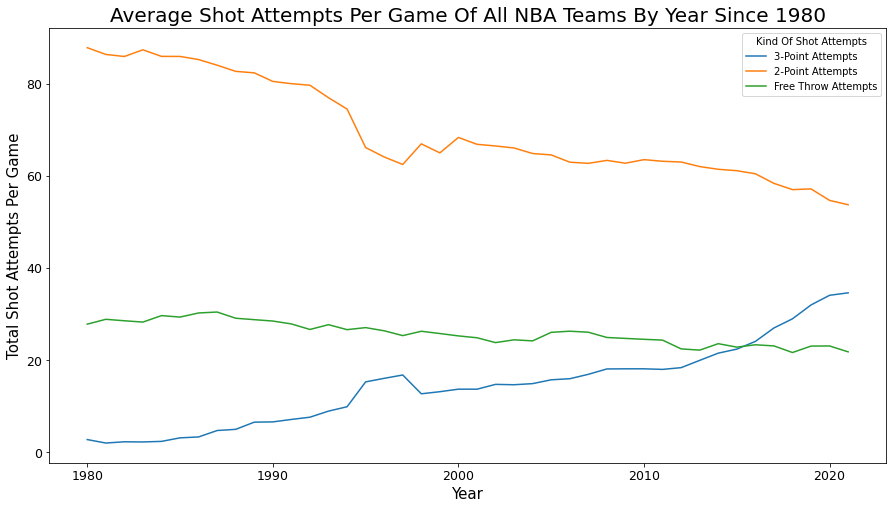

In [80]:
plt.figure(figsize = [15,8])
nba_avg_df.groupby('Year')['3PA'].mean().plot(label = '3-Point Attempts')
nba_avg_df.groupby('Year')['2PA'].mean().plot(label = '2-Point Attempts')
nba_avg_df.groupby('Year')['FTA'].mean().plot(label = 'Free Throw Attempts');

plt.title('Average Shot Attempts Per Game Of All NBA Teams By Year Since 1980', fontsize = 20)
plt.legend(title = 'Kind Of Shot Attempts')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Shot Attempts Per Game', fontsize = 15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5);

> Now, we don't see the sudden drastic drops in the years 1999, 2011, and 2019. Let's analyze it. <br><br>
Starting with the 2-point field goal attempts(2PA), we can see that the average attempts per game in the regular season have been declining since 1980. It took a big dip near the start of the '90s and never recovered, hovering around 60 shot attempts to this day. Next, we will move onto the free-throw attempts(FTA) line where we see a similar downtrend, but no drastic dips. It started off around 30 FTA in the '80s but slowly declined to around 20 over the years.<br> <br>
Lastly, we will examine the 3-point attempts (3PA) line plot. In the '80s, we can see that NBA teams are barely taking any 3-pint attempts, but it has grown dramatically since then. As of 2021, we can see that NBA teams are taking an average of 30 3-point attempts a game!

## Questions - nba_avg_df
> **nba_avg_df** <br> <br>
`1.` What is the distribution like for age for all NBA Teams for all years like?<br>
`2.` What are the winning percantages for each NBA team throughout their history since 1980?<br>
`3.` What is the distribution for the Margin of Victory(MOV) like?<br>
`4.` Choose some numeric variables you are interested in and analyze the pairwise correlation between them. <br>
`5.` Plot the two strongest negative and positive correlations from the heatmap and identify them by their Finals rankings and era played. What are some of the characteristics of champions, runner-ups, and teams that got knocked out or never qualified for the playoffs?<br>
`6.` What is the True Shooting %(TS%) like for each era and Finals ranking?<br>
`7.` What is the average 3PAr based on Finals ranking and era?<br>
`8.`What is the age distribution like for each Finals rankings? Do the champions and runner-ups tend to be older or younger?<br>
`9.` Historically, did the champions and runner-ups average more total assists per game than the teams that were knocked out or never qualified for the playoff? Use the latters' mean as a benchmark. <br>
`10.`Seperating the data by Conference and Finals Ranking, what is the average regular season MOV for each era?

**`1.` What is the distribution like for age for all NBA Teams for all years like?**

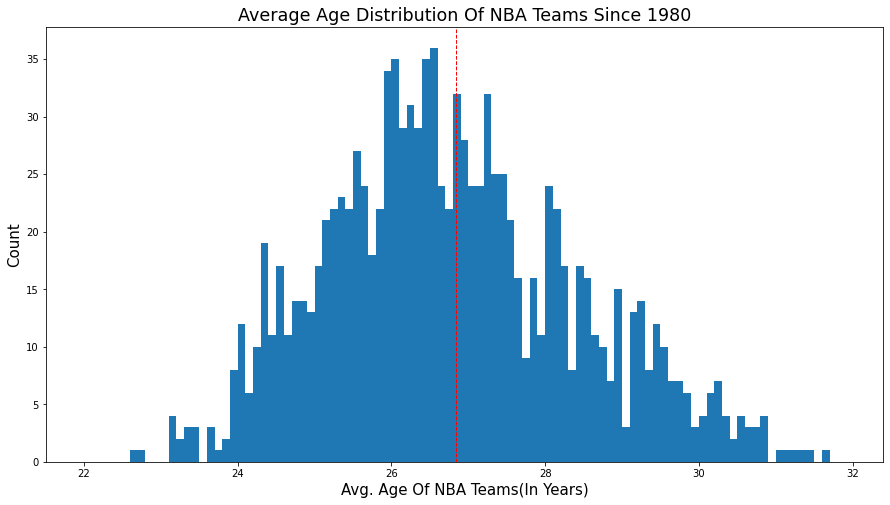

In [81]:
fig, ax = plt.subplots(figsize = [15,8])
bins = np.arange(22,32, 0.1)

# Plot Age histogram
nba_avg_df.Age.hist(bins = bins)
plt.grid(False)
plt.xlabel('Avg. Age Of NBA Teams(In Years)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Average Age Distribution Of NBA Teams Since 1980', fontsize = 17.5)
plt.axvline(nba_avg_df.Age.mean(), color='red', linestyle='dashed', linewidth=1);

**Question 1 Observation**
> Although the graph is skewed to the right a little, the distribution seems pretty normal. We can see that the highest counts for average team age since 1980 are between the age of 26-27. The graph is also telling us the mean is roughly around 27 years of age.

**`2.` What are the winning percantages for each NBA team throughout their history since 1980?**

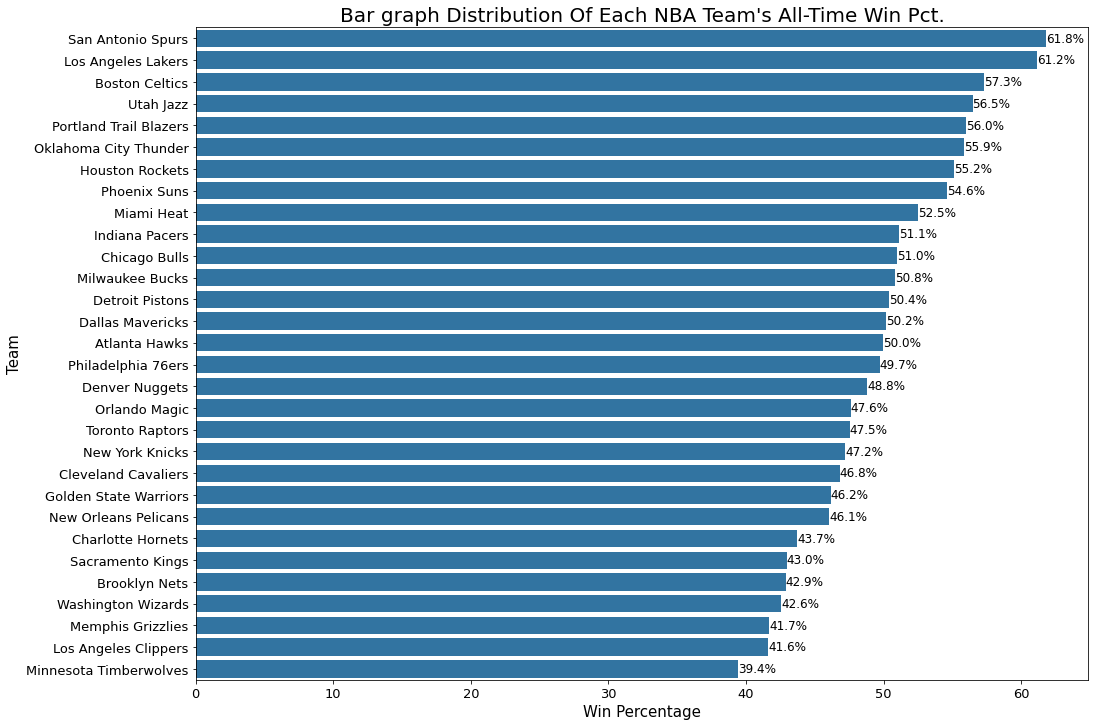

In [82]:
nba_avg_df['Win%'] = (nba_avg_df['Wins']/(nba_avg_df['Losses'] + nba_avg_df['Wins'])) * 100
alltime_win_order = pd.DataFrame(nba_avg_df.groupby('Team')['Win%'].mean().sort_values(ascending = False)).reset_index()

fig = plt.subplots(figsize = [16,12])
base_color = sb.color_palette()[0]
ax = sb.barplot(data = alltime_win_order, y = 'Team', x = 'Win%', color = base_color)
plt.title('Bar graph Distribution Of Each NBA Team\'s All-Time Win Pct.', fontsize = 20)
plt.ylabel('Team', fontsize = 15)
plt.xlabel('Win Percentage', fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

# print percentages next to bars
for i in ax.containers:
    ax.bar_label(i, fontsize = 12, fmt='%.1f%%');

**Question 2 Observation**
> In this chart, we can see the all-time winning percentage for every single team. The most winningest team in the NBA since 1980 is the San Antonio Spurs who won 61.8% of their regular-season games. Coming in 2nd are the Lakers with 61.2%. However, I would have never guessed that the Minnesota Timberwolves would have the worst winning percentage with 39.4%. 

**`3.` What is the distribution for the Margin of Victory(MOV) like?**

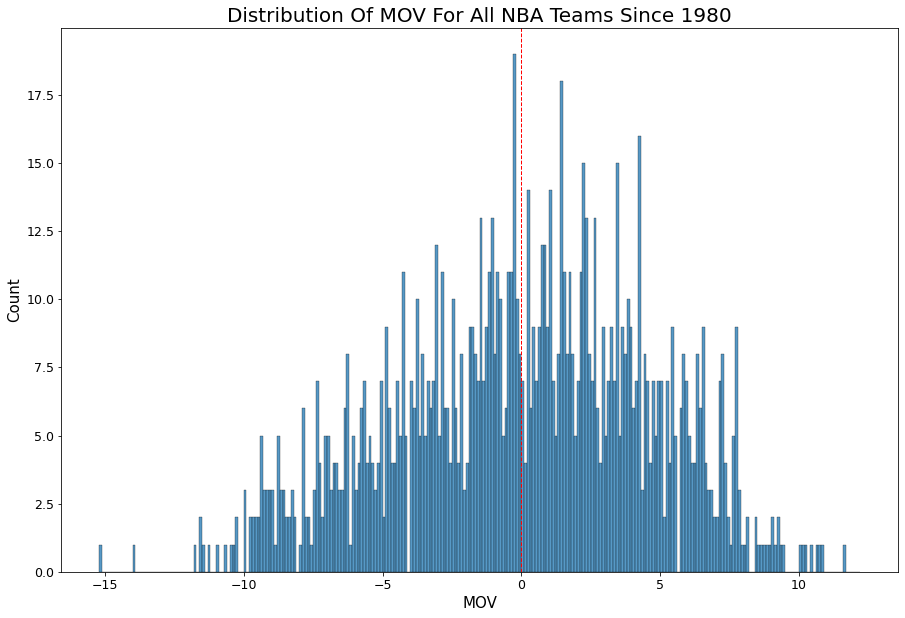

In [83]:
fig, ax = plt.subplots(figsize=(15, 10))
bins = np.arange(nba_avg_df.MOV.min(), nba_avg_df.MOV.max(), 0.1)

#plot MOV graph
sb.histplot(nba_avg_df.MOV, kde = False, bins = bins, ax = ax)
plt.grid(False)
plt.axvline(nba_avg_df.MOV.mean(), color='red', linestyle='dashed', linewidth=1)

# texts-related 
plt.title('Distribution Of MOV For All NBA Teams Since 1980', fontsize = 20)
plt.xlabel('MOV', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5);

**Question 3 Observation**
> In the graph above, we see the distribution of MOV. The graph is somewhat normally distributed, but seems to be skewing to the left a little. 

**`4.`Choose some numeric variables you are interested in and analyze the pairwise correlation between them.**
> For this observation, I have chosen the stats that I am most interested in analyzing. As you know, I will be focused primarily on offensive stats. However, I have also included some additional non-offensive stats. My goal from this point on is to regular season offensive stats for every final rankings. Down below, I will be explaining the meaning of the stats, starting with 'eFG%'. You can also go to the [Basketball-Reference Glossary](https://www.basketball-reference.com/about/glossary.html) to look up their meanings if you prefer.<br> <br>
    1. **eFG%**: Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.<br>
    2. **TS%**: True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.<br>
    3. **MOV**: Margin of Victory<br>
    4. **ORtg**:Offensive Rating; for players, it is points produced per 100 possessions, while for teams it is points scored per 100 possessions. <br>
    5. **DRtg**: Defensive Rating; for players and teams, it is points allowed per 100 possessions.<br>
    6. **Pace**: The pace factor is an estimate of the number of possessions per 48 minutes by a team.<br>
    7. **TOV%**: Turnover percentage is an estimate of turnovers per 100 plays.<br>
    8. **ORB%**: Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.<br>
    9. **3PAr**: Percentage of FG Attempts from 3-Point Range.
    
**Please remember for this question that correlation does not imply causation.**

In [84]:
num_vars = ['Age', '2P%', '3P%', 'eFG%', 'TS%', 'ORtg', 
            'MOV','DRtg', 'Pace', 'TOV%', 'ORB%', 'Win%', '3PAr']

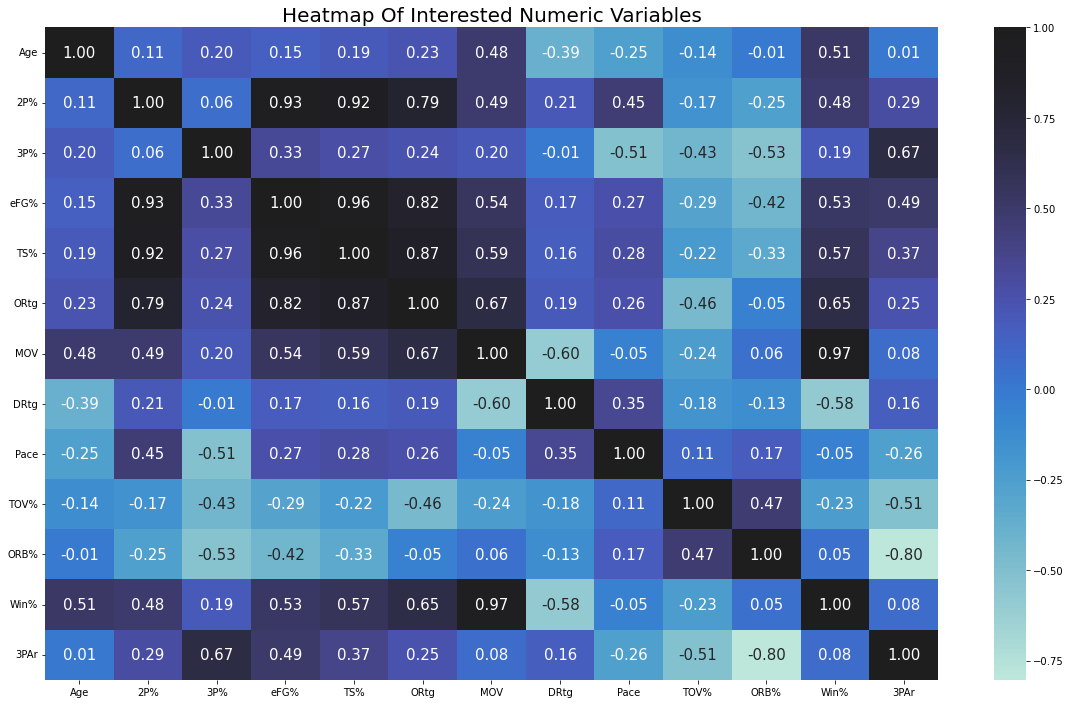

In [85]:
# plot heatmap of numeric variables
fig, ax = plt.subplots(figsize = [20,12])
sb.heatmap(nba_avg_df[num_vars].corr(), annot = True, fmt = '0.2f', 
           center = 1, annot_kws = {'size': 15})
plt.yticks(rotation = 360)
plt.title('Heatmap Of Interested Numeric Variables', fontsize = 20);

**Question 4 Observation**
> There are many correlations here to go over, so I will mainly be pointing out the ones that I am interested in. First, let's start off with the surprises; the first surprise that I've found in this heat map is the relationship between DRtg & MOV, which happens to have a strong negative correlation of -0.6. If DRtg goes down, MOV goes up. As a result because of the strong correlation between Win% and MOV, we find that the relationship between DRtg and Win% is also moderately strong in correlation. One very strong correlation displayed is the relationship between 3PAr and ORB%. Another negative correlation that I found interesting was the 3P% and its relationship with 2 other variables: Pace and ORB%. It seems like when the 3P% of a team goes up, they tend to grab fewer offensive rebounds and possess the ball less on the court. In fact, if we examine all of the shooting-related percentages (3P%, eFG%, and TS%) and their relationships with ORB%, we find that they all have moderately negative correlations. One negative correlation that I thought would be stronger is the one between TOV% and MOV, but it turns out to be weak.<br><br>
Next, we will examine positive correlations. Starting with the Win% and MOV relationship, we find that they have the strongest positive correlation with 0.97! This makes sense since an average negative MOV would mean that a team is losing most of their games. In fact, if we just analyze the MOV row, we'll find that MOV has a moderately strong relationship with all the shooting-related stats except for 3P%. Next, we find that all the shooting percentages -mainly, 2P%, eFG%, and TS%- are heavily correlated to one another, which comes as no surprise. However, one surprise that I found was the relationship between Win% and Age, which displays a moderately, strong positive correlation. One more positive relationship I found interesting was the one between DRtg and Pace, which displays a moderate correlation. This is telling me that if the pace increases, the DRtg also increases somewhat in the same direction.


**`5.`Plot the two strong negative and positive correlations from the heatmap and identify them by their Finals rankings and era played. What are some of the characteristics of champions, runner-ups, and teams that got knocked out or never qualified for the playoffs?**

In [86]:
year_list = list(nba_avg_df.Year.unique())

#creating the era column
for i, row in nba_avg_df.iterrows():
    if row.Year in year_list[:10]:
        nba_avg_df.at[i, 'Era'] = "1980s"
    if row.Year in year_list[10:20]:
        nba_avg_df.at[i, 'Era'] = "1990s"
    if row.Year in year_list[20:30]:
        nba_avg_df.at[i, 'Era'] = "2000s"
    if row.Year in year_list[30:]:
        nba_avg_df.at[i, 'Era'] = "2010 & Beyond"
        
nba_avg_df.head()

,Team,Age,Wins,Losses,Year,Playoff,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,3PAr,eFG%,FT,FTA,FT%,TS%,AST,ORB,TRB,PTS,MOV,ORtg,DRtg,Pace,TOV%,ORB%,Finals_Rk,Win%,Era
0,Boston Celtics,27.3,61,21,1980,True,44.1,90.1,49.0,42.1,84.9,49.6,2.0,5.1,38.4,5.7,50.1,23.3,29.9,77.9,55.0,26.8,15.0,44.9,113.5,7.79,109.4,101.9,102.6,15.4,34.8,Knocked Out,74.390244,1980s
1,Los Angeles Lakers,26.2,60,22,1980,True,47.5,89.9,52.9,47.3,88.6,53.4,0.2,1.2,20.0,1.4,53.0,19.8,25.5,77.5,56.9,29.4,13.2,45.6,115.1,5.90,109.5,103.9,104.1,16.5,32.6,Champion,73.170732,1980s
2,Oklahoma City Thunder,27.0,56,26,1980,True,43.3,92.3,47.0,42.6,90.0,47.4,0.7,2.3,31.2,2.5,47.4,21.1,27.5,76.8,52.0,24.9,16.8,47.9,108.5,4.66,105.8,101.2,101.8,14.9,36.4,Knocked Out,68.292683,1980s
3,Philadelphia 76ers,27.0,59,23,1980,True,43.0,87.3,49.2,42.6,85.7,49.7,0.3,1.5,21.6,1.7,49.4,22.9,29.6,77.2,54.4,27.1,14.5,46.6,109.1,4.22,105.0,101.0,103.0,17.2,33.5,Runner-Up,71.951220,1980s
4,Milwaukee Bucks,25.3,49,33,1980,True,44.9,92.1,48.8,44.3,90.2,49.1,0.6,1.9,32.3,2.1,49.1,19.6,25.6,76.4,53.2,27.8,15.2,44.4,110.1,3.94,106.8,102.9,102.4,15.0,35.2,Knocked Out,59.756098,1980s


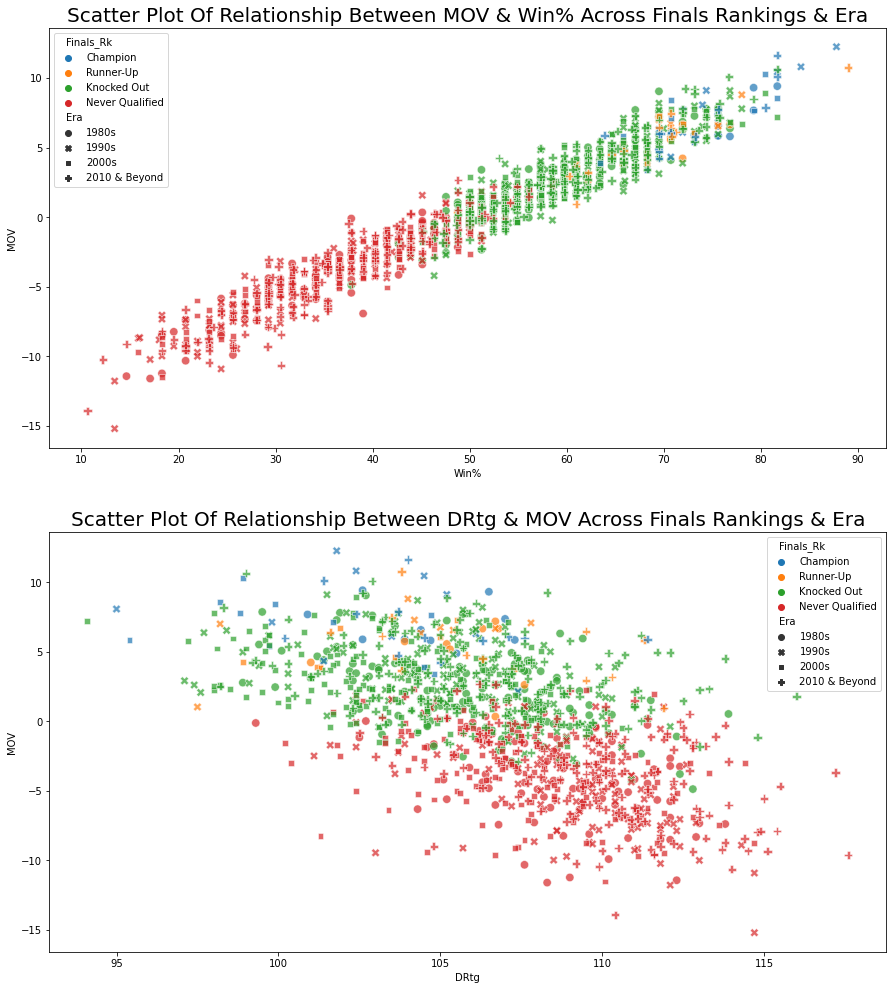

In [87]:
# convert Finals_Rk column to category
nba_avg_df['Finals_Rk'] = nba_avg_df['Finals_Rk'].astype(Rk_ordered_var)

fig, ax = plt.subplots(figsize = [15,17])

plt.subplot(2,1,1)
sb.scatterplot(data = nba_avg_df, x = 'Win%', y='MOV', 
               hue = 'Finals_Rk', style ='Era', s =70, alpha = 0.7)
plt.title('Scatter Plot Of Relationship Between MOV & Win% Across Finals Rankings & Era', 
          fontsize = 20);

plt.subplot(2,1,2)
sb.scatterplot(data = nba_avg_df, x = 'DRtg', y='MOV', 
               hue = 'Finals_Rk', style ='Era', s =70, alpha = 0.7)
plt.title('Scatter Plot Of Relationship Between DRtg & MOV Across Finals Rankings & Era', 
          fontsize = 20);

**Question 5 Observation**
> Starting with the first scatterplot(MOV & Win%), we see that all the champions have over 60% Win% during the regular season. This statement is also true for the runner-ups, but the champions have the higher minimum, which seems to be about 65%. Furthermore, it seems like champions also have the higher minimum for MOV as well with around 2, while runner-ups' minimum MOV is 0. Historically, it seems like teams need to at least win at 60% of their games with a 0-point margin of victory in order to reach the finals. In the upper-right corner, we see two teams who achieved almost a 90% winning percentage with at least a 10-point MOV. One is from the 1990s era and the other from the 2010s & Beyond, but only the '90s was a champion while the other was a runner-up. In the bottom-right corner, we see two teams that have only about 10% of their games. What's staggering about it is their MOV, which is close to -15 which means they are losing on average 15 points per game! The one with the lowest MOV, but higher Win% out of the two comes from the 1990s era. The other one is from the 2010s era.<br> <br>
Moving onto the second scatterplot (3PAr & ORB%, we can see that the majority of the champions' defensive ratings (DRtg) are packed between 100 and 110. Here we can clearly see that those with the higher defensive ratings are more likely to be unqualified for the playoffs. The only champion that has a defensive rating higher than 110 comes from the 2010s & Beyond era. If we look below 0 on the MOV axis, we find that almost all of the teams were either knocked out or never qualified for the playoffs. Here we can see that they all have one thing in common a high defensive rating.

**`6.` What is the True Shooting %(TS%) like for each era and Finals ranking?**

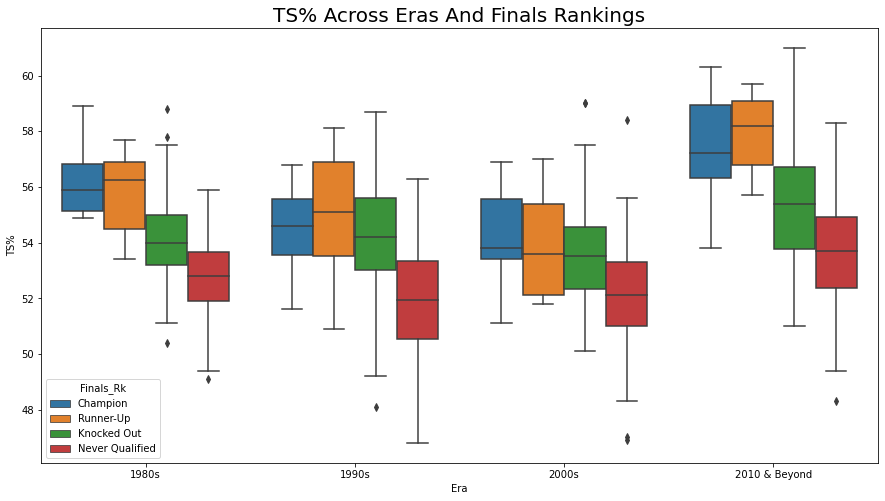

In [88]:
fig = plt.figure(figsize = [15, 8])
sb.boxplot(data = nba_avg_df, y = 'TS%', x='Era', hue = 'Finals_Rk')
plt.title('TS% Across Eras And Finals Rankings', fontsize = 20);

**Question 6 Observation**
> Starting with the 1980s era on the right, we see that the runner-ups have the highest TS% median during the regular season with a little over 56% while the Champions have the second highest. However, we also notice that the Champions have the shortest range from their minimum to the 25% quartile and their minimum is higher than the runner-ups' 25% quartile. Next, we find that those who have been knocked out in the playoffs have the 3rd highest TS% median. Furthermore, we also see that the median of the 'Knocked Out' group is higher than the 75% quartile of those who didn't qualify. This pattern between the 'Knocked Out' and 'Never Qualified' groups seems to persist in every era. Keep in mind that there is a lot more data in the last two. For the next era (the 1990s), the patterns for each ranking are very similar to the last era, except the champion's range between minimum and the 25% quartile is much longer than the previous. One thing to note is that the '90s era seems to have a lower TS% than the '80s.<br> <br>
For the 2000s era, we finally see that the champions come out on top for the highest TS% median with about 54%. As we move to the right, more on the rankings, we see the median get lower each time. Lastly, for the 2010s & Beyond era, we see that the patterns revert back with the runner-ups having the higher TS% median. What's notable about this one is how much higher all of the medians are than all the previous ones. The runner-ups for this era have a 58% TS% median, while the champions have about 57%.

**`7.`What is the average 3PAr based on Finals ranking and era?**
> A quick reminder that 3-Point Attempt Rate(3PAr) is the percentage of FG attempts from 3-point range.

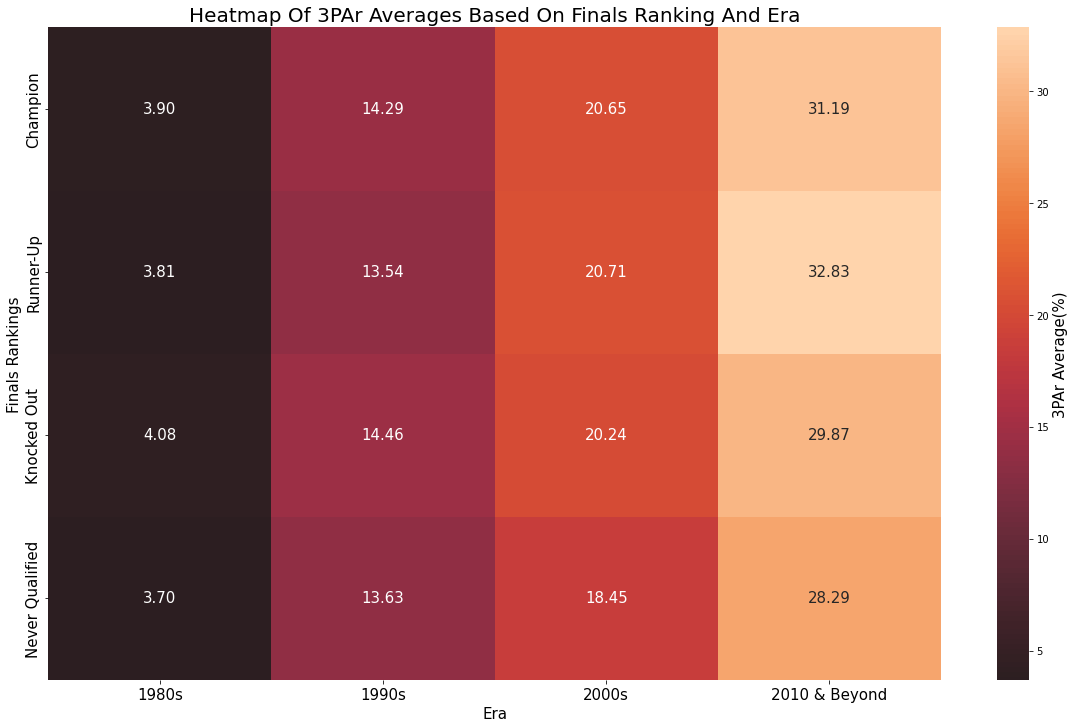

In [89]:
# plotting heat map
fig, ax = plt.subplots(figsize = [20,12])

c_means = nba_avg_df.groupby(['Finals_Rk', 'Era'])['3PAr'].mean().reset_index(name = 'Avg. 3PAr')
c_means = c_means.pivot(index = 'Finals_Rk', columns = 'Era', 
                        values = 'Avg. 3PAr')


sb.heatmap(c_means, annot = True, fmt = '.2f', center = 1, 
           annot_kws = {'size': 15}, cbar_kws={'label': '3PAr Average(%)'})
plt.title('Heatmap Of 3PAr Averages Based On Finals Ranking And Era', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Era', fontsize = 15)
plt.ylabel('Finals Rankings', fontsize = 15)

# set color bar font size
# help: https://stackoverflow.com/questions/48586738/seaborn-heatmap-colorbar-label-font-size
ax.figure.axes[-1].yaxis.label.set_size(15);

**Question 7 Observation**
>From this heatmap that we've just plotted, we can tell that the 3-Point attempt rate increases after each era, no matter the Finals ranking. This means that players are taking more and more 3-point shots on attempts in the regular season. Earlier, we examined the increases in total 3-point attempts in a year and average 3-point attempts in a game over the years on separate line plots. This heatmap gives us a sense of how drastic an increase is by turning them into percentages. We can really get a sense of how the offensive game in the NBA has changed. Using the 'Champion' row as an example, we see that only 3.9% of all shot attempts were from the 3-point line in the 1980s era. In the next era, the percentage nearly quadrupled to 13.54%; by the 2010s & Beyond era, we see that 31.19% of all shot attempts were taken from the 3-point line. This is the general trend for all of the  Finals rankings.

**`8.`What is the age distribution like for each Finals rankings? Do the champions and runner-ups tend to be older or younger?**

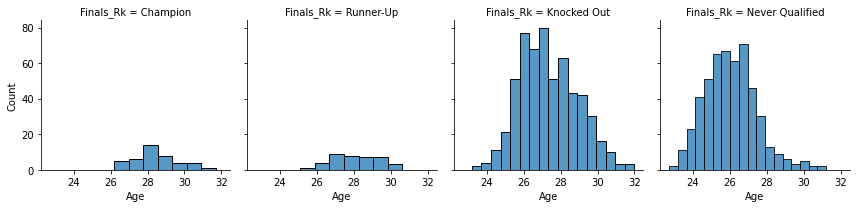

In [90]:
g = sb.FacetGrid(data = nba_avg_df, col="Finals_Rk")
g.map(sb.histplot, 'Age');

In [91]:
nba_avg_df.Age.mean()

26.84020618556701

**Question 8 Observation**
> Although we have a smaller sample size that fits the criteria for Champion and Runner-up, we find that the teams who won NBA championships are on average older, while the runner-ups tend to be a little younger. In the champion histogram on the far-left, most teams are around 28 years of age. In the runner-up histogram, we see a majority of them are between 27-30. Furthermore, we don't see any teams where the average age is 25 or below in either the champion or runner-up. <br><br>
However, when we move onto teams that have been knocked out or never qualified, we find all of the teams where the average age is 25 or younger.

**`9.` Historically, did the champions and runner-ups average more total assists per game than the teams that were knocked out or never qualified for the playoff? Use the latters' mean as a benchmark.**

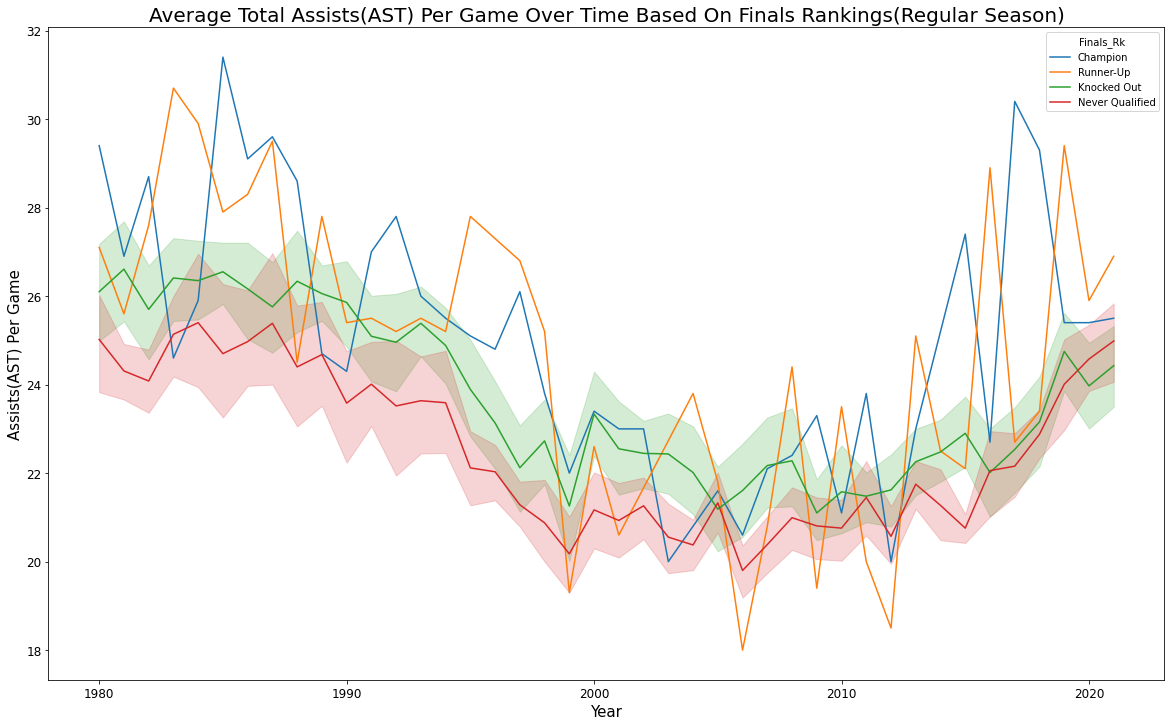

In [92]:
fig, ax = plt.subplots(figsize = [20,12])

sb.lineplot(data=nba_avg_df, x="Year", y="AST", hue="Finals_Rk")
plt.title('Average Total Assists(AST) Per Game Over Time Based On Finals Rankings(Regular Season)',
         fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Assists(AST) Per Game', fontsize = 15);

**Question 9 Observation**
> From the line plot above, we can see that champions and runner-ups have averaged more assists per game during the regular season. Sometimes they both averaged the league's top 2 total assists per game, as seen in the mid-1980s. However, there are some cases when either one would average the lowest assists the league has seen in the mid-2000s and early 2010s. This seems to be telling me that those who average more assists during the regular season will have a higher likelihood of reaching the NBA Finals. 

**`10.`Seperating the data by Conference and Finals Ranking, what is the average regular season MOV for each era?**
> For this final question, I will be creating one more column, Conference(Conf.). This column will have two values - "West" and "East"- which are based on their home arena location. You can google "NBA Western Conference Teams" to view the list of NBA teams and their respective locations. 

In [93]:
# create list of western conference team 
west_team = ['Los Angeles Lakers', 'Oklahoma City Thunder','Phoenix Suns',
             'Sacramento Kings','Houston Rockets', 'San Antonio Spurs', 
             'Portland Trail Blazers', 'Brooklyn Nets', 'New York Knicks',
             'Los Angeles Clippers','Denver Nuggets', 'Golden State Warriors', 
             'Utah Jazz','Dallas Mavericks', 'Minnesota Timberwolves', 
             'Memphis Grizzlies', 'New Orleans Pelicans']

# assign the team's respective conference
for i, row in nba_avg_df.iterrows():
    if row.Team in west_team:
        nba_avg_df.at[i, 'Conf.'] = 'West'
    else:
        nba_avg_df.at[i, 'Conf.'] = 'East'

In [94]:
nba_avg_df[nba_avg_df['Finals_Rk'] == 'Champion']['Conf.'].value_counts()

West    22
East    20
Name: Conf., dtype: int64

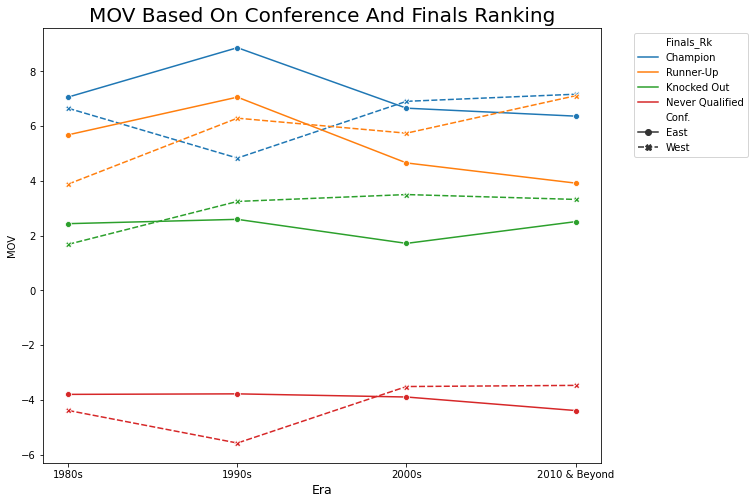

In [95]:
plt.figure(figsize = [10,8])

sb.lineplot(data=nba_avg_df, x="Era", y="MOV", hue="Finals_Rk", 
            style="Conf.", err_style= None, markers=True)
plt.xlabel('Era', fontsize = 12.5)
plt.ylabel('MOV')
plt.title('MOV Based On Conference And Finals Ranking',
         fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [96]:
nba_avg_df.groupby(['Era','Finals_Rk', 'Conf.'])['MOV'].mean()

Era            Finals_Rk        Conf.
1980s          Champion         East     7.064000
                                West     6.652000
               Runner-Up        East     5.684000
                                West     3.884000
               Knocked Out      East     2.436863
                                West     1.682329
               Never Qualified  East    -3.801290
                                West    -4.388929
1990s          Champion         East     8.867143
                                West     4.833333
               Runner-Up        East     7.060000
                                West     6.291250
               Knocked Out      East     2.594483
                                West     3.249277
               Never Qualified  East    -3.782241
                                West    -5.579167
2000s          Champion         East     6.656667
                                West     6.907143
               Runner-Up        East     4.656000
            

**Question 10 Observation**
> Now that we have plotted everything, lets examine it , but, first, I wanted to check how many times each conference has won the championship over the past 4 decades. It seems like the Western Conference has won slightly more with a total of 22, while the East has a total of 20. Now we will jump to the lineplot where I will primarily focus on explaining the champions' and runner-ups' MOV. <br> <br>
Starting off with the 1980s era, we see that the Eastern Conference champions have achieved an average margin of victory (MOV) of about 7 points during the regular season, while the Western Conference champions have just a little under that with 6.7 points. Those who played in the Eastern Conference and won second place (runner-up) have an average regular-season MOV of 5.7 points, while the Western Conference's runner-ups of the same era had an average MOV of 3.9. Moving onto the 1990s era, we find that those who have become the NBA champions and come from the East won by a slightly higher average MOV during the regular season than the previous era with 8.9 points. However, the Western champions' regular-season MOV decreased to 4.8 points. The runner-ups for both conferences in the 1990s seem to be doing better during the regular season during this time, too. It's better than the last era. The MOV for the Eastern Conference runner-ups averaged out to about 7 points, while the Western Conference averaged 6.3 points- slight increases since the '80s.<br> <br>
Moving onto the 2000s era, we see that the Western champions have averaged a higher MOV than the Eastern ones for the first time. The Western champions have an average regular-season MOV of 6.9 points while the East comes out at 6.7. This pattern also continues with the runner-ups as well! The Western runner-ups averaged 5.7 MOV while the Eastern ones averaged 4.7 points. It seems like the West has been getting more skilled since the '90s. <br><br>
Lastly, we move onto the current era(2010 & Beyond) where we see that the Western champion MOV increased slightly from the last era to 7.2 points. The Eastern champions'have an average of 6.4 points, which is a slight decrease from the previous era. Examining the runner-ups for this era, we see the East has an average MOV of 3.9, but the West has 7.1! That's almost doubled!<br> <br>
One thing I do want to mention about those who were knocked out is that their MOV never went over 4, but we can see that over time it got larger.  

**`Extra`**

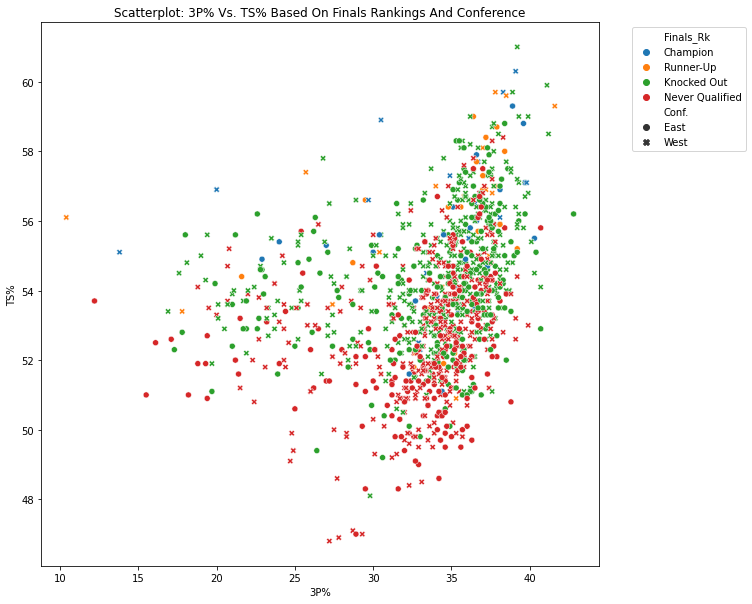

In [97]:
fig = plt.figure(figsize = [10,10])
ax = sb.scatterplot(data=nba_avg_df, x="3P%", y="TS%", hue="Finals_Rk", style = "Conf.")
sb.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1.0))
plt.title('Scatterplot: 3P% Vs. TS% Based On Finals Rankings And Conference');

**Extra Observation**
> This is quite interesting to see. Taking a look at the top right corner where True-Shooting Percantage(TS%) is greater than 58% and high 3-point percentage (3P%) is greater than 35%; we can see that most of the teams are from the Western Conference. Furthermore, we can see that there are a number of champions and runner-ups in this area with 2 and 7 respectively. However, when examining the champions and runner-ups in the other area of this graph, we find that they are pretty spreadout. One champion even had below a 15% 3-point average during the regular season. Another runner-up team even had a 10% 3-point average during the regular season!

## Conclusion
**That was a lot of visualizations! Now let’s summarize what we found from our entire exploratory process. First, I will begin with the total stats dataset; then, we will move onto the average dataset where we really analyzed how teams played during the regular reason based on their Finals ranking. <br> <br>
Beginning with the total stats dataset, we found that the Atlanta Hawks have scored the most points in NBA history with 361,254 points as of the end of the year 2021 (2020-2021 season). The Boston Celtics and Brooklyn Nets came in second and third, respectively. During the beginning of my investigation, I guessed that at least two of these would have won an NBA championship. However, that quickly changed after I plotted my bar graph on the number of playoff appearances by team. <br> <br>
In the plot, I found that the San Antonio Spurs have made it to the playoffs the most over the years with a total of 36 appearances. Following the Spurs are the Lakers and Blazers, who are both tied for 2nd place with a total of 34 appearances. It seems more likely that those who have made the playoffs more would have a greater chance of winning the championship. In a way, my suspicions have been proven correct when we plotted a pie chart of the teams that have won at least one NBA championship. We found that the Lakers have won a little over a quarter of all NBA championships over the last 40 years with 11. Following them are the Chicago Bulls and San Antonio Spurs with 6 and 5 championships, respectively. Looking at the least number of championships over the last 4 decades, we can see that 5 teams are tied for last; those teams are the 76ers, Mavericks, Cavaliers, Raptors, and Bucks.<br> <br>
During out investigation, we have also found that the number of 2-point attempts during the regular season has been decreasing over time, but the number of 3-pointers has been skyrocketing! <br> <br>
Next, we moved onto the average stats dataset, where we found that the average age of an NBA team over the years is 27 years of age. Additionally, we also found that the winningest team in the NBA since 1980 is the San Antonio Spurs, who won 61.8% of their regular-season games. Coming in 2nd are the Lakers with 61.2%. However, I would have never guessed that the Minnesota Timberwolves would have the worst winning percentage with 39.4%.<br> <br>
After that, we created a heatmap where we mapped out the correlation of all the numeric variables. There were certainly some surprises such as the negative relationship between TOV% and MOV which I expected to be strong, but it turns out to be weak. One positive relationship I found surprising was the one between age and regular-season winning percentage, which led me to believe that teams who won championships were on the older side. After plotting out the strongest positive relationship on  a scatterplot (MOV & Win%), we found that all the champions have over 60% Win% during the regular season, and a minimum MOV of 2. <br> <br>
Next, when we plotted out the true-shooting percentage based on Finals rankings and eras, we found that the median TS% has been higher than it has ever been regardless of the rankings. This means that players are taking more efficient shots. In the current era, the runner-ups for this era have a 58% TS% median, while the champions have about 57%. Afterward, we plotted a heatmap of the 3-Point Attempt Rate (3PAr) and found that it has been increasing era after era. Using the 'Champion' row as an example, we see that only 3.9% of all shot attempts were from the 3-point line in the 1980s era. In the next era, the percentage nearly quadrupled to 13.54%; by the 2010s & Beyond era, we see that 31.19% of all shot attempts were taken from the 3-point line. This is the general trend for all of the Finals rankings. <br> <br>
Next, we plotted the age distribution on a bar plot. Although we have a smaller sample size that fits the criteria for Champion and Runner-up, we find that the teams who won NBA championships are on average older, while the runner-ups tend to be a little younger. Furthermore, the champions and runner-ups have averaged more assists per game during the regular season. Sometimes they both averaged the league's top 2 total assists per game, as seen in the mid-1980s. <br> <br>
Finally, we separated the teams up into 2 conferences (West & East) for our last question. Examining only the champions and runner-ups,  we found that the West’s regular-season MOV average was lower in the 1980s and 90s, but it recovered and outpaced the East in the last 2 eras. For example, the runner-ups for this era (2010s & Beyond), we see the East has an average MOV of 3.9, but the West has 7.1! That's almost doubled!**
